# Artem Moskalev. Home Assignment -- 2

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

# Part 2. Ensemble methods

In this part you are asked to complete  several theoretical tasks as well as
a couple of practical challenges.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Task 1:  Some theory of Decision Trees

$$
\begin{aligned}
& R_m := \text{set of train objects at the node m} \\ 
& N_m := |R_m| \\
& p_{mk} = \frac{1}{N_m}\sum\limits_{(x_i, y_i)\in R_m}[y_i = k] \\
\end{aligned}
$$

### Task 1.1

Show that Gini Index can be written as

$$
\sum_{k\neq k'} p_{mk}p_{mk'}
= ???
= 1 - \sum\limits_{k=1}^K p_{mk}^2
$$

#### BEGIN Solution

Let's rewrite $\sum_{k\neq k'} p_{mk}p_{mk'}$ as $\sum_{k=1}^K p_{mk} (\sum_{k\neq k'}^K p_{mk'})$, then:<br><br>

$\sum_{k=1}^K p_{mk} (\sum_{k\neq k'}^K p_{mk'}) = \sum^K_{k=1} p_{mk}(1-p_{mk}) = \sum^K_{k=1}p_{mk} - \sum^K_{k=1} p^2_{mk} = 1 - \sum^K_{k=1} p^2_{mk}$


**END Solution**

<br/> <!--Intentionally left blank-->

## Task 2: Practice with Bootstrap and Trees

In this task you will be asked to make a couple of plots depicting the variance
of the predicted probability of class $1$ by some classification algorithm.

But first generate the toy [Crescent Moons dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)

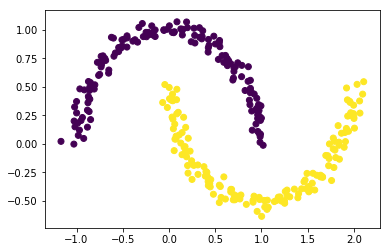

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);

### Task 2.1

You need to somehow estimate a function $x\mapsto \mathbb{V} T(x)$ for a class of
estimators $T$, defined by
$$ \mathbb{V} T(x) = \mathbb{V}_{S \sim D^m} T(x; S)
    \,, $$
where $T(x; S)$ means "classifier of class $T$ returned by a learning algorithm applied
to the training sample $S$ and evaluated at a point $x$". The notaion $S \sim D^m$ means
"a randomly drawn iid sample of size $m$ from the data distribution $D$". The key problem
is that you **never know** $D$ but you have a ready training sample $(X, y)$ from it...

Please, implement a **procedure** which uses **bootstrap** to construct an estimate of
$\mathbb{V} T(\cdot)$ on a fixed common test dataset for the provided classifier. Please
refer to **Seminar 5** for pictures, **explanation** and examples, and to **scikit's
API** documentation.

**Bonus** You will get an extra $+2$ pt. if instead of re-implementing everything
yourself, you figure out how to use sklearn's `BaggingClassifier`. You are in for a
certain feeling of satisfaction with how **clever** sklearn's API is!

In [5]:
from sklearn.ensemble import BaggingClassifier

def bootstrap_predictions(estimator, X, y, X_test, n_bootstrap=101):
    """Bootstrap a given classifier.
    
    Parameters
    ----------
    estimator : object
        A classifier instance with sklearn-compatible interface.

    X : array, shape = (n_samples, n_features)
        The X part of the full dataset.

    y : array, shape = (n_samples,)
        The target labels of the full dataset.

    X_test : array, shape(n_test_samples, n_features)
        The test data to measure theoutput of bootstrapped estimators on.

    n_bootstrap : int, nonnegative
        The number of bootstrap replication of `estimator` to make.

    Returns
    -------
    proba : array, shape=(n_test_samples, n_bootstrap), dtype=float
        The matrix of bootstrapped outputs of the classifier.

    bag : list
        The list of bootstrap replications of the classifier.

    Details
    -------
    The `(X, y)` full dataset is used to generate bootstrap samples. Each one
    of `n_bootstrap` samples is used to train a separate copy of the provided
    `estimator`. Each classifier form resulting set of bootstrapped estimators
    is applied to `X_test` and the output is recorded in `proba` array.
    """

    ### BEGIN Solution
    
    bagging_guy = BaggingClassifier(base_estimator=estimator, n_estimators=n_bootstrap, n_jobs=-1, random_state=1011).fit(X, y)
    #probs, samples = bagging.predict_proba(X_test), bagging_guy.estimators_samples_
    
    bag = bagging_guy.estimators_
    proba = [each_estimator.predict(X_test) for each_estimator in bag]
    
    ### END Solution

    return np.array(proba).T, bag

<br/> <!--Intentionally left blank-->

### Task 2.2

Define a regular $2$-D mesh $51 \times 51$ that **covers the box**, within which
the original dataset resides.

In [6]:
def expand(a, b, factor=0.2):
    """Make a wider interval defined by the endpoints."""
    return a - abs(a) * factor, b + abs(b) * factor

X_l, X_h = X.min(axis=0), X.max(axis=0)
xx0, xx1 = np.meshgrid(np.linspace(*expand(X_l[0], X_h[0]), num=51),
                       np.linspace(*expand(X_l[1], X_h[1]), num=51))

X_grid = np.c_[xx0.ravel(), xx1.ravel()]

Plot the bootstrap estimate ($101$ replications) of the variance of the predicted
probability of class $1$ at each point of the $2$-d grid. As the base classifiers
use the **Decision Tree Classifier** with different settings for `min_samples_leaf`
* $3$, $10$, $75$.

You must create three separate contour plots. Make sure to properly label your
axes and provide meaningful titles for each [subplot](https://matplotlib.org/api/axes_api.html#axis-labels-title-and-legend).

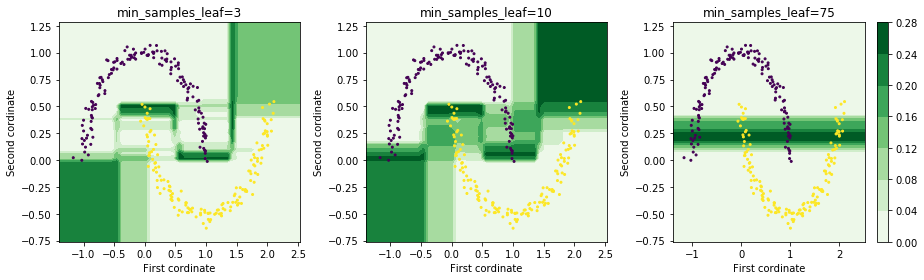

In [7]:
from sklearn.tree import DecisionTreeClassifier

'''
def apply_bootstrap(model, X_test):
    out, _ = bootstrap_predictions(model, X, y, X_test)
    return out
'''

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13, 4))

for ax, min_samples_leaf in zip(axes, [3, 10, 75]):
    ### BEGIN Solution
    
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    z,_ = bootstrap_predictions(model, X, y, X_grid)
    var = np.var(z, axis=1)
    
    
    a=ax.contourf(xx0, xx1, var.reshape(xx0.shape), cmap='Greens')
    
    ax.set_xlabel("First cordinate")
    ax.set_ylabel("Second cordinate")
    ax.set_title("min_samples_leaf="+str(min_samples_leaf))
    
    ### END Solution

    ax.scatter(X[:, 0], X[:, 1], c=y, s=4)

plt.colorbar(a)
plt.tight_layout()

## Task 3:  Boosting and its theory

Minimization of a loss function is an optimization task, and "Gradient Boosting"
is one of the many methods to perform optimization. It shoould be noted that it
uses **greedy** approach and thus, like greedy algorithms in CS, may produce
results that are not *globally* optimal.

$$
\begin{aligned}
    & b_n(x) := \text{the best base model from the family of the algorithms $\mathcal{A}$} \\
    & \gamma_n(x) := \text{scale or weight of the new model} \\
    & a_N(x) = \sum_{n=0}^N \gamma_n b_n(x) := \text{the final composite model}
\end{aligned}
$$

### Gradient Boosting Algorithm

Consider a loss loss function $L(y, z)$ for target $y$ and prediction $z$, and let
$(x_i, y_i)_{i=1}^l$ be out train dataset for a regression task. 


1. Initialize $a_0(x) = \hat{z}$ with the **flat constant prediction**
$\hat{z} = \arg\min\limits_{z \in \mathbb{R}} \sum_{i=1}^l L(y_i, z)$;
2. For $n$ from `1` to `n_boost_steps` do:
    * Solve the current subporblem $G_n(b_n, \gamma_n) \to \min\limits_{b_{n}, \gamma_n}$
    where 
    $$ G_n(b, \gamma) = \sum_{i=1}^l L\bigl(y_i, a_{n-1}(x_i) + \gamma b(x_i)\bigr) $$
    with the following method:
    \begin{align}
      & s_i = - \frac{\partial}{\partial z} L(y_i, z) \Big\vert_{z=a_{n-1}(x_i)}
          \\
      & b_n(x) = \arg\min\limits_{b\in\mathcal{A}}\sum_{i=1}^l \bigl(b(x_i) - s_i\bigr)^2
          \\
      & \gamma_n = \arg\min_\gamma G_n(b_n, \gamma)
          \\
      & a_n(x) = a_{n-1}(x) + \gamma_n b_n(x)
    \end{align}
3. return $a_N(x) = a_0(x) + \sum_{n=1}^N \gamma_n b_n(x)$

### Task 3.1

Consider the *logistic loss* for classification task $L(y,z) = \log\bigl(1 + e^{-y z}\bigr)$,
where $y \in \{-1, +1\}$. Derive the **gradient** for it with respect to $z$.

#### BEGIN Solution
<br>


$$\frac{\partial L(y, z)}{\partial z} = \frac  1 {1+e^{-yz}} (1+e^{-yz})^{'}_z = - \frac {ye^{-yz}}  {1+e^{-yz}}$$



**END Solution**

<br/> <!--Intentionally left blank-->

### Task 3.2

At the $n$-th step of Garient Boosting ($n \geq 1$ we compute the "residuals"
$(s_i)_{i=1}^l$ and learn $x\mapsto b_n(x)$ with a regression algorithm $\mathcal{A}$
applied to the dataset $(x_i, s_i)_{i=1}^l$. For the next two tasks **assume
that we have already perfomed these substeps**.

Derive the **optimal value** of $\gamma_n$ for *MSE* loss function $L(y, z) = \tfrac12 (y - z)^2$.

#### BEGIN Solution

$L(y,z)=\frac 1 2 \sum^l_{i=1} (y_i - z_i)^2 = \frac 1 2 \sum_{i=1}^l (y_i - a_{n-1}(x_i)-\gamma_n b_n(x_i))^2$<br>

Consider $s_i \triangleq - \frac \partial {\partial z} L(y,z) \Big\vert_{z=a_{n-1}(x_i)}$ <br>

$s_i(x) - \frac \partial {\partial z} \frac 1 2 (y_i - z_i)^2 = y_i - z = y_i - a_{n-1}(x_i)$ <br>

Thus, $\frac 1 2 \sum_{i=1}^l (y_i - a_{n-1}(x_i)-\gamma_n b_n(x_i))^2 = \frac 1 2 \sum_{i=1}^l (s_i-\gamma_n b_n(x_i))^2$ <br>

- FOC: <br>

$\frac {\partial L(y,z)} {\partial \gamma} = \sum_{i=1}^l(s_i - \gamma_n b_n(x_i))(-b_n(x_i)) = 0 $ 

$\frac {\partial L(y,z)} {\partial \gamma} = -\sum_{i=1}^l s_i b_n(x_i) + \gamma_n \sum_{i=1}^l b_n^2(x_i) \Rightarrow \gamma_n^* = \frac {\sum_{i=1}^l s_i b_n(x_i)} {\sum_{i=1}^l b^2_n(x_i)}$<br>

- Minima condition:

$\frac {\partial^2 L(y, z)} {\partial \gamma^2_n} = \sum_{i=1}^l b_n^2(x_i) \geq 0 $

**END Solution**

<br/> <!--Intentionally left blank-->

### Task 3.3

Let $S = (x_i, y_i)_{i=1}^l$ be a sample for a classification task $y_i \in \{-1, +1\}$.

The **AdaBoost** algorithm can be regarded as a gradient boosting algorithm
with the exponential loss $L(y,z) = e^{-y z}$. Consdier the state of **AdaBoost**
at the $(T-1)$-step
$$ G_{T-1}(b_T, \gamma_T)
    = \sum_{i=1}^l L\bigl(y_i, a_{n-1}(x_i) + \gamma b(x_i)\bigr)
    = \sum_{i=1}^l \underbrace{\exp(- y_i a_{T-1}(x_i))}_{w^{T-1}_i}
        \exp(- y_i \gamma_T b_T(x_i))
    \,.
$$

#### Task 3.3.1

Derive the next weights $w^T_i$ used in $G_T$ at the stage $T$ as a function
of the learnt classifier $b_T$ and the current weights $w^{T-1}_i$;

#### BEGIN Solution

$W^{T-1}_i \triangleq exp(-y_i a_{T-1}(x_i))$, so $W^T_i = exp(-y_i a_{T}(x_i))$. <br>

From here, we can derive the following: 

 - $a_{T-1}(x_i) = - \frac {ln(W^{T-1}_i)} {y_i}$<br>

And:

 - $a_T(x_i) = a_{T-1}(x_i) + \gamma_T b_T(x_i) = \gamma_T b_T(x_i) - \frac {ln(W^{T-1}_i)} {y_i}$.
 
Thus:

$W^T_i  = exp(-y_i \gamma_T b_T(x_i) + ln(W^{T-1}_i)) = exp(-y_i \gamma_T b_T(x_i))exp(ln(W^{T-1}_i)) = exp(-y_i \gamma_T b_T(x_i))W^{T-1}$

**END Solution**

## Task 4: Practical Boosting

In this task you are asked to implement a boosting algorithm, compare speed of
different popular boosting libraries, and use boosting to measure feature importance.

### Task 4.1: Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. **(5 pt.)** Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **(2 pt.)** **Plot the decision boundary** on a $2$-d grid;
3. **(2 pt.)** Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to the 6th seminar.

In [9]:
from copy import deepcopy
from tqdm import tqdm
from scipy.optimize import golden
from IPython import display

def logloss(y, predictions):
    loss = np.log(1.+np.exp(-y*predictions)).sum()
    return loss

def loglossGrad(y, predictions):
    return -y/(1.+np.exp(predictions*y))

def naive_boosting_predict(list_models,list_weights,point):
    prediction = 0
    for i,model in enumerate(list_models):
        gamma = list_weights[i]
        if i != 0:
            prediction += gamma*model.predict(point)
        else:
            prediction += gamma*np.repeat(model, point.shape[0])
    return prediction


def naive_boosting_fit(N, X_train, y_train, regressor, loss_grad, loss, verbose=False, X_all=None, y_all=None):
    b_0 = np.mean(y_train)
    gamma_0 = 0.5
    
    list_models = list()
    list_weights = list()
    
    list_models.append(b_0)
    list_weights.append(gamma_0)
    #fig = plt.figure() 
        
    for n in range(N):
        predictions = naive_boosting_predict(list_models, list_weights, X_train)
        residuals = loglossGrad(y_train, predictions)
        regressor.fit(X_train, -residuals)
        
        weight_func = lambda gamma: logloss(y_train, predictions+gamma*regressor.predict(X_train))
        
        gamma = golden(weight_func)
        #return weight_func, gamma
        
        if verbose and n % 2 == 0:
            all_predict = naive_boosting_predict(list_models, list_weights, X_all)

        list_models.append(deepcopy(regressor))
        list_weights.append(gamma)
    
    return list_models, list_weights

In [10]:
from sklearn.tree import DecisionTreeRegressor

y_test[y_test==0], y_train[y_train==0]= -1., -1. #redefine classes

DTC = DecisionTreeRegressor()
list_models, list_weights = naive_boosting_fit(100, X_train, y_train, DTC, loglossGrad, logloss)

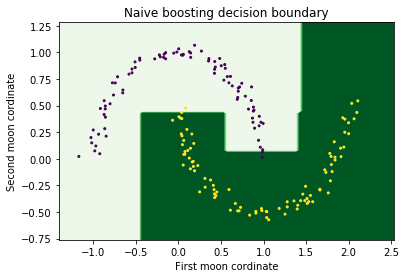

In [11]:
X_l, X_h = X.min(axis=0), X.max(axis=0)
xx0, xx1 = np.meshgrid(np.linspace(*expand(X_l[0], X_h[0]), num=101),
                       np.linspace(*expand(X_l[1], X_h[1]), num=101))

X_grid = np.c_[xx0.ravel(), xx1.ravel()]

z = naive_boosting_predict(list_models, list_weights, X_grid)

plt.contourf(xx0, xx1, z.reshape(xx0.shape), cmap='Greens')
plt.title("Naive boosting decision boundary")
plt.xlabel('First moon cordinate')
plt.ylabel('Second moon cordinate')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=4);

###### test performance metrics:

In [12]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import f1_score, accuracy_score, average_precision_score, recall_score, precision_score

ROC AUC: 0.933089811027


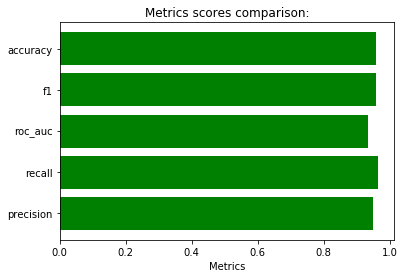

In [13]:
metrics = [f1_score, accuracy_score, average_precision_score, recall_score, precision_score]
metrics_labels = ('accuracy', 'f1', 'roc_auc', 'recall', 'precision')
metrics_pos = np.arange(len(metrics))
scores = list()

for each_metric in metrics:
    pred = naive_boosting_predict(list_models, list_weights, X_test)
    pred[pred>0], pred[pred<1]=1.,-1.
    score = each_metric(y_test, pred)
    scores.append(score)
    
fig, ax = plt.subplots()
ax.barh(metrics_pos, scores, align='center', color='green')
ax.set_yticks(metrics_pos)
ax.set_yticklabels(metrics_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Metrics')
ax.set_title('Metrics scores comparison:');

print('ROC AUC:',scores[2])

### Task 4.2: Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. **(3 pt.)** take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. **(6 pt.)** use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [14]:
import xgboost as xgb
import catboost as ctb
import lightgbm as lgb

/home/art_mos/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import time

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

In [12]:
X_train.shape

(341, 30)

In [13]:
xgb_model = xgb.XGBClassifier()
ctb_model = ctb.CatBoostClassifier(logging_level='Silent')
lgb_model = lgb.LGBMClassifier()

XGBoost training time is:
CPU times: user 174 ms, sys: 7.73 ms, total: 182 ms
Wall time: 51.1 ms

Catboost training time is:
CPU times: user 47.6 s, sys: 13.6 s, total: 1min 1s
Wall time: 24.9 s

Lightgbm training time is:
CPU times: user 455 ms, sys: 13.5 ms, total: 469 ms
Wall time: 155 ms



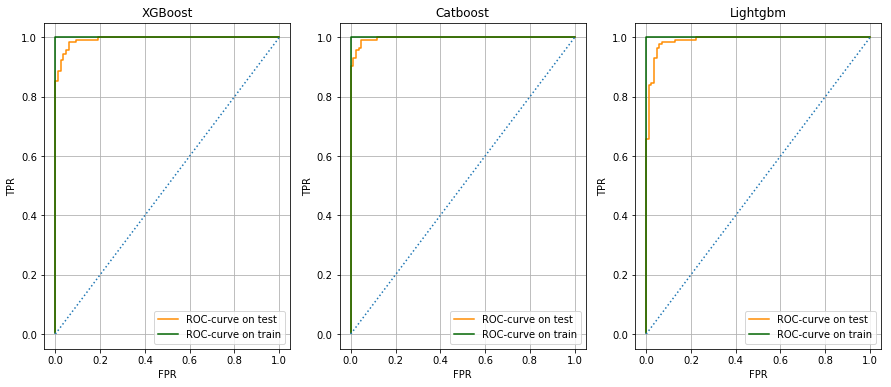

In [14]:
### BEGIN Solution

models,titles = [xgb_model, ctb_model, lgb_model], ('XGBoost','Catboost', 'Lightgbm')

fig, ax = plt.subplots(1,3, figsize=(15,6))
for i,model in enumerate(models):
    print(titles[i] + ' training time is:')
    %time model.fit(X_train, y_train)
    print('')
    
    test_predictions, test_probabilities = model.predict(X_test), model.predict_proba(X_test)[:, 1]
    training_predictions, training_probabilities = model.predict(X_train), model.predict_proba(X_train)[:, 1]
    false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)
    training_false_positive_rates, training_true_positive_rates, _ = roc_curve(y_train, training_probabilities)
    
    ax[i].plot(false_positive_rates, true_positive_rates, color='darkorange', label = 'ROC-curve on test')
    ax[i].plot(training_false_positive_rates, training_true_positive_rates, color='darkgreen', label = 'ROC-curve on train')
    ax[i].plot([0,1],[0,1], linestyle='dotted')
    ax[i].set_xlabel('FPR')
    ax[i].set_ylabel('TPR')
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].grid();
    
    ### END Solution

In [15]:
print(xgb_model.max_depth)
print(lgb_model.max_depth)

3
-1


### Tunning:

I chose these parameters because they are shared among all classifiers. I didn't find how to tune gamma (not available directly lgbm and catboost), min_child_weight (not directly available in catboost), min_child_samples and num_leaves (both are only available in lgbm) for all classifier simultaneously in order to keep corespondence.

In [23]:
parameters_xgb = {'learning_rate':[0.01, 0.1, 0.5, 1.], 'max_depth':[2,3,5,10],'n_estimators':[60,100,200],
                  'reg_lambda':[0.5, 1., 2., 3., 5.], 'subsample' : [0.6, 0.8 ,1.]}

parameters_lgbm = {'learning_rate':[0.01, 0.1, 0.5, 1.], 'max_depth':[2,3,5,10], 'n_estimators':[60,100,200],
                   'reg_lambda':[0.5, 1., 2., 3., 5.], 'subsample' : [0.6, 0.8 ,1.], 'metric':['binary_logloss']}

parameters_cat = {'learning_rate':[0.01, 0.1, 0.5, 1.], 'depth':[2,3,5,10], 'iterations':[60, 100,200],
                  'l2_leaf_reg':[0.5, 1., 2., 3., 5.],'subsample' : [0.6, 0.8 ,1.],
                  'bootstrap_type':['Bernoulli']} #such bootstrap_type is chosen to enable subsample tunning

###### XGBoost GridSearch

In [24]:
print('Approx time: ',(((2160 / 42)*2.3)/60)/60)

Approx time:  0.032857142857142856


In [25]:
xgb_model = xgb.XGBClassifier(seed=1011)

xgb_model_gs = GridSearchCV(xgb_model, parameters_xgb, scoring='roc_auc', verbose=True, n_jobs=-1)
xgb_model_gs.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  4.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1011, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0], 'max_depth': [2, 3, 5, 10], 'n_estimators': [60, 100, 200], 'reg_lambda': [0.5, 1.0, 2.0, 3.0, 5.0], 'subsample': [0.6, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [26]:
xgb_model_gs.best_score_

0.99428296651017811

In [27]:
xgb_model_gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_lambda': 1.0,
 'subsample': 0.8}

###### Catboost GridSearch

In [28]:
print('Approx time: ',(((2160 / 42)*12)/60)/60)

Approx time:  0.1714285714285714


In [29]:
ctb_model = ctb.CatBoostClassifier(logging_level='Silent', random_state=1011)

ctb_model_gs = GridSearchCV(ctb_model, parameters_cat, scoring='roc_auc', verbose=True, n_jobs=-1)
ctb_model_gs.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 236.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=<catboost.core.CatBoostClassifier object at 0x7f38ad07f7b8>,
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0], 'depth': [2, 3, 5, 10], 'iterations': [60, 100, 200], 'l2_leaf_reg': [0.5, 1.0, 2.0, 3.0, 5.0], 'subsample': [0.6, 0.8, 1.0], 'bootstrap_type': ['Bernoulli']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [30]:
ctb_model_gs.best_score_

0.99481277245718369

In [31]:
ctb_model_gs.best_params_

{'bootstrap_type': 'Bernoulli',
 'depth': 2,
 'iterations': 100,
 'l2_leaf_reg': 3.0,
 'learning_rate': 0.5,
 'subsample': 0.6}

###### Lightgbm GridSearch

In [32]:
print('Approx time: ',(((2160 / 42)*3.5)/60)/60)

Approx time:  0.05


In [33]:
lgb_model = lgb.LGBMClassifier(random_state=1011)

lgb_model_gs = GridSearchCV(lgb_model, parameters_lgbm, scoring='roc_auc', verbose=True, n_jobs=-1)
lgb_model_gs.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  4.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=1011,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0], 'max_depth': [2, 3, 5, 10], 'n_estimators': [60, 100, 200], 'reg_lambda': [0.5, 1.0, 2.0, 3.0, 5.0], 'subsample': [0.6, 0.8, 1.0], 'metric': ['binary_logloss']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [34]:
lgb_model_gs.best_score_

0.99384285663513927

In [35]:
lgb_model_gs.best_params_

{'learning_rate': 1.0,
 'max_depth': 5,
 'metric': 'binary_logloss',
 'n_estimators': 200,
 'reg_lambda': 3.0,
 'subsample': 0.6}

##### Estimate depth/time and n_estimators/time relation:

In [36]:
def depth_time(label, X, y):
    
    depth_list, time_ = list(), list()
    
    for i,depth in enumerate([10, 30, 90, 200, 500]):

        depth_list.append(depth)
        
        if label == 'xgboost':
            model = xgb.XGBClassifier(max_depth=depth, seed=1011)
        elif label == 'catboost':
            depth_cat = [1,3,5,7,9][i]
            model = ctb.CatBoostClassifier(depth=depth_cat,logging_level='Silent', random_state=1011)
        elif label == 'lgbm':
            model = lgb.LGBMClassifier(max_depth=depth, random_state=1011)

        time1 = time.clock()
        model.fit(X,y)
        time2 = time.clock()
        time_.append(time2 - time1)
        
    return depth_list, time_
            

def n_estimators_time(label, X, y):
    
    n_estimators_list, time_ = list(), list()
    
    for i,n_estimators in enumerate([50, 100, 300, 500, 1000]):

        n_estimators_list.append(n_estimators)
        
        if label == 'xgboost':
            model = xgb.XGBClassifier(n_estimators=n_estimators, seed=1011)
        elif label == 'catboost':
            model = ctb.CatBoostClassifier(iterations=n_estimators,logging_level='Silent',random_state=1011)
        elif label == 'lgbm':
            model = lgb.LGBMClassifier(n_estimators=n_estimators, random_state=1011)

        time1 = time.clock()
        model.fit(X,y)
        time2 = time.clock()
        time_.append(time2 - time1)
        
    return n_estimators_list, time_

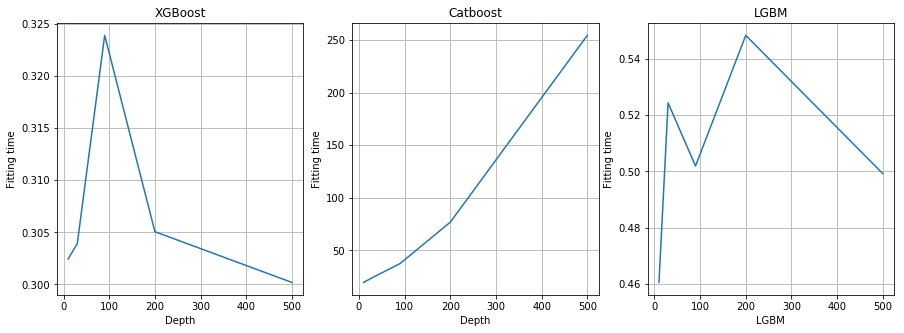

In [37]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

xg_dep, xg_dep_time = depth_time('xgboost', X,y)
cat_dep, cat_dep_time = depth_time('catboost', X,y)
lgbm_dep, lgbm_dep_time = depth_time('lgbm', X,y)

ax[0].plot(xg_dep, xg_dep_time)
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Fitting time')
ax[0].set_title('XGBoost')
ax[0].grid();

ax[1].plot(cat_dep, cat_dep_time)
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('Fitting time')
ax[1].set_title('Catboost')
ax[1].grid();

ax[2].plot(lgbm_dep, lgbm_dep_time)
ax[2].set_xlabel('LGBM')
ax[2].set_ylabel('Fitting time')
ax[2].set_title('LGBM')
ax[2].grid();

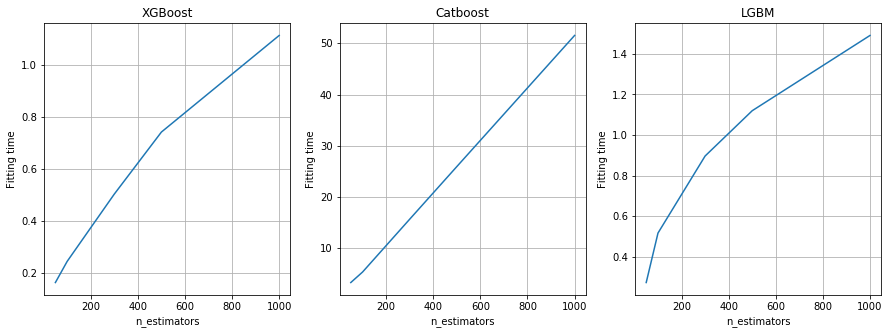

In [38]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

xg_dep, xg_dep_time = n_estimators_time('xgboost', X,y)
cat_dep, cat_dep_time = n_estimators_time('catboost', X,y)
lgbm_dep, lgbm_dep_time = n_estimators_time('lgbm', X,y)

ax[0].plot(xg_dep, xg_dep_time)
ax[0].set_xlabel('n_estimators')
ax[0].set_ylabel('Fitting time')
ax[0].set_title('XGBoost')
ax[0].grid()

ax[1].plot(cat_dep, cat_dep_time)
ax[1].set_xlabel('n_estimators')
ax[1].set_ylabel('Fitting time')
ax[1].set_title('Catboost')
ax[1].grid()

ax[2].plot(lgbm_dep, lgbm_dep_time)
ax[2].set_xlabel('n_estimators')
ax[2].set_ylabel('Fitting time')
ax[2].set_title('LGBM')
ax[2].grid();

#### ROC Curves of best models:

Best XGBoost training time is:
CPU times: user 187 ms, sys: 1.98 ms, total: 189 ms
Wall time: 53.1 ms
With ROC AUC:  0.964686331533 

Best Catboost training time is:
CPU times: user 1.91 s, sys: 967 ms, total: 2.88 s
Wall time: 973 ms
With ROC AUC:  0.964686331533 

Best LGBM training time is:
CPU times: user 271 ms, sys: 2.6 ms, total: 273 ms
Wall time: 76.3 ms
With ROC AUC:  0.958829365079 



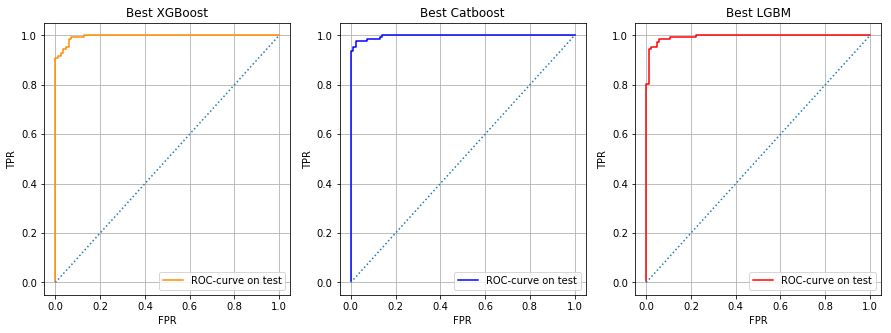

In [44]:
### BEGIN Solution

best_xgb = xgb.XGBClassifier(**xgb_model_gs.best_params_, seed=1011)
#best_xgb = xgb.XGBClassifier(seed=1011)

best_cat = ctb.CatBoostClassifier(depth=2, iterations=100, l2_leaf_reg=3.0, learning_rate= 0.5, logging_level='Silent', random_state=1011)
#best_cat = ctb.CatBoostClassifier(logging_level='Silent', random_state=1011)

best_lgbm = lgb.LGBMClassifier(**lgb_model_gs.best_params_, random_state=1011)
#best_lgbm = lgb.LGBMClassifier(random_state=1011)

models, titles = [best_xgb, best_cat, best_lgbm], ('Best XGBoost','Best Catboost', 'Best LGBM')
colors = ('darkorange','b','r')

fig, ax = plt.subplots(1,3, figsize=(15,5))
for i,model in enumerate(models):
    print(titles[i]+' training time is:')
    %time model.fit(X_train, y_train)
    predicts = model.predict(X_test)
    print('With ROC AUC: ', roc_auc_score(predicts, y_test),'\n')
    
    test_predictions, test_probabilities = predicts, model.predict_proba(X_test)[:, 1]
    false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)
    
    ax[i].plot(false_positive_rates, true_positive_rates, color=colors[i], label = 'ROC-curve on test')
    ax[i].plot([0,1],[0,1], linestyle='dotted')
    ax[i].set_xlabel('FPR')
    ax[i].set_ylabel('TPR')
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].grid();
    
    ### END Solution

<br/> <!--Intentionally left blank-->